### 웹브라우저를 이용해서 스크래핑
* Selenium
    - 웹 테스트 도구
    
* selenium 설치
* 크롬드라이버 설치

In [1]:
# selenium 설치
!pip install selenium

In [7]:
!pip install --upgrade selenium

  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.22
    Uninstalling urllib3-1.22:
      Successfully uninstalled urllib3-1.22
  Attempting uninstall: certifi
    Found existing installation: certifi 2020.6.20
    Uninstalling certifi-2020.6.20:
      Successfully uninstalled certifi-2020.6.20
  Attempting uninstall: selenium
    Found existing installation: selenium 3.141.0
    Uninstalling selenium-3.141.0:
      Successfully uninstalled selenium-3.141.0


In [15]:
# 크롬드라이버 설치
# https://chromedriver.chromium.org/downloads
# 현재 설치된 크롬버전과 일치하는 파일 다운로드
# 크롬 오른쪽 상단 ... > 도움말 > Chrome 정보 에서 버전확인

from selenium import webdriver
br = webdriver.Chrome('chromedriver')

In [16]:
# url 이동
br.get('http://www.daum.net')

In [4]:
br.save_screenshot('daum.png')

True

### selenium 메서드
#### 요소 추출 메서드
* find_element("id/name", 값)
* find_element(By.CSS_SELECTOR, 'CSS 셀렉터')

#### 조작 메서드
* get(url) : url이동
* click() : 클릭
* send_keys(값) : 값 입력
* quit() : 종료
* implicitly_wait(초) : 최대대기시간(초)

In [18]:
# 검색란에 검색어 입력
#br.find_element_by_id('q').send_keys('파이썬')
br.find_element('id','q').send_keys('파이썬') # 위에꺼 안되면 요렇게

In [20]:
from selenium.webdriver.common.by import By

In [21]:
br.find_element(By.CSS_SELECTOR,'#daumSearch > fieldset > div > div > button.ico_pctop.btn_search').click()

'<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" class="win chrome"><head profile="http://a9.com/-/spec/opensearch/1.1/">\n<meta http-equiv="content-Type" content="text/html;charset=utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="autocomplete" content="off">\n<meta name="referrer" content="always">\n<meta name="format-detection" content="telephone=no">\n<meta property="og:title" content="파이썬 – Daum 검색">\n<meta property="og:url" content="https://search.daum.net/search?w=tot&amp;q=%ED%8C%8C%EC%9D%B4%EC%8D%AC">\n<meta property="og:description" content="Daum 검색에서 파이썬에 대한 최신정보를 찾아보세요.">\n<meta property="og:image" content="https://search1.daumcdn.net/search/statics/common/img/og_search.png">\n<meta property="og:site_name" content="다음검색">\n<title>파이썬 – Daum 검색</title>\n<link rel="search" type="application/opensearchdescription+xml" href="//search.daum.net/OpenSearch.xml" title="Daum">\n<link rel="stylesheet" type="text/css" href="//search1.daumcdn.net/search/s
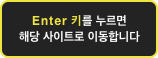

In [22]:
# 응답받은 소스
br.page_source

In [23]:
# 브라우저 종료
br.quit()

In [24]:
# 정리
from selenium import webdriver
br = webdriver.Chrome('chromedriver')
br.get('http://www.daum.net')
br.find_element('id','q').send_keys('파이썬')
from selenium.webdriver.common.by import By
br.find_element(By.CSS_SELECTOR,'#daumSearch > fieldset > div > div > button.ico_pctop.btn_search').click()
html = br.page_source
br.quit()

'<html xmlns="http://www.w3.org/1999/xhtml" lang="ko" class="win chrome"><head profile="http://a9.com/-/spec/opensearch/1.1/">\n<meta http-equiv="content-Type" content="text/html;charset=utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="autocomplete" content="off">\n<meta name="referrer" content="always">\n<meta name="format-detection" content="telephone=no">\n<meta property="og:title" content="파이썬 – Daum 검색">\n<meta property="og:url" content="https://search.daum.net/search?w=tot&amp;q=%ED%8C%8C%EC%9D%B4%EC%8D%AC">\n<meta property="og:description" content="Daum 검색에서 파이썬에 대한 최신정보를 찾아보세요.">\n<meta property="og:image" content="https://search1.daumcdn.net/search/statics/common/img/og_search.png">\n<meta property="og:site_name" content="다음검색">\n<title>파이썬 – Daum 검색</title>\n<link rel="search" type="application/opensearchdescription+xml" href="//search.daum.net/OpenSearch.xml" title="Daum">\n<link rel="stylesheet" type="text/css" href="//search1.daumcdn.net/search/s
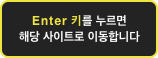

In [25]:
html

In [32]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')
subject = soup.select('#mArticle div.coll_cont > ul > li > div.wrap_cont > div > a.fn_tit_u > strong')
for s in subject:
    print(s.string)

에이콘아카데미 홍대학원
가비아 무제한 호스팅
100만명의 선택,KG에듀원
빅데이터 분석 솔루션 텍스톰
KG아이티뱅크 김서균 교육담당
에듀윌 국비교육원
기업용 파이썬 나비엠알오
SBS아카데미컴퓨터학원분당점
파이썬, 컴스쿨닷컴
KG 아이티뱅크학원 주제희
쿠팡 파이썬
11번가 파이썬
인터넷서점 알라딘
쉽게배우는 인강 아이티스쿨
KG아이티뱅크 IT학원 홍기민


In [33]:
'''
네이버 뉴스
https://n.news.naver.com/article/011/0004100236
제목 추출
selenium + BeautifulSoup

* 댓글수 추출
'''

'\n네이버 뉴스\nhttps://n.news.naver.com/article/011/0004100236\n제목 추출\nselenium + BeautifulSoup\n\n* 댓글수 추출\n'

### selenium에서 특정 element의 로딩 대기
* WebDriverWait 객체를 통해 로딩 대기
* 이 기능을 활용하면 거의 모든 사이트를 크롤링 가능

In [38]:
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as ec
from selenium.webdriver.common.by import By

In [45]:
from selenium import webdriver
# 브라우저 옵션
opt = webdriver.ChromeOptions()
opt.add_argument('headless') # 브라우저 숨김
br = webdriver.Chrome('chromedriver', options=opt)
br.get('https://n.news.naver.com/article/011/0004100236')
# 해당 elemnet가 로딩시까지 대기
obj = WebDriverWait(br, 5).until(ec.presence_of_element_located((By.CSS_SELECTOR,'.u_cbox_count')))
html = br.page_source
br.quit()
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')
subject = soup.select_one('#ct > div.media_end_head.go_trans > div.media_end_head_title > h2').string
subject

"생삼겹 110만원어치 주문 후 잠적…역대급 노쇼에 주인 '멘붕'"

In [40]:
comment_count = soup.select_one('#cbox_module > div.u_cbox_wrap.u_cbox_ko.u_cbox_type_sort_favorite > div.u_cbox_head > a > span.u_cbox_count')
comment_count

<span class="u_cbox_count">215</span>

In [43]:
print(comment_count.string)

215


In [46]:
'''
네이버 API를 이용해서
검색어 : 수리남
네이버뉴스 제목, 내용 추출

'''

'\n네이버 API를 이용해서\n검색어 : 수리남\n네이버뉴스 제목, 내용 추출\n\n'

In [2]:
import os
import sys
import urllib.request
# client_id = "dqJ35Ak5ZT2TeZWZW4Uy"
client_id = "aeWLdjxAXU_GuuCWUIs3"
client_secret = "시크릿키"
encText = urllib.parse.quote("수리남")

result =[]
for i in range(10):
    url = "https://openapi.naver.com/v1/search/news.json?display=100&query=" + encText + "&start="+str(i*100+1) # JSON 결과
    # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # XML 결과
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        #print(response_body.decode('utf-8'))
        res = response_body.decode('utf-8')
        #print(res)
        import json
        data = json.loads(res)
        result.append(data['items'])
        #news = res['items']
    else:
        print("Error Code:" + rescode)

In [3]:
len(result)

10

In [4]:
len(result[0])

100

In [5]:
result[0]

[{'title': '비트로 자체개발 한글서체 &apos;인스파이어체&apos; 무료 공개',
  'originallink': 'http://www.kookje.co.kr/news2011/asp/newsbody.asp?code=0200&key=20221007.99099001641',
  'link': 'https://n.news.naver.com/mnews/article/658/0000022024?sid=101',
  'description': '앞서 개발된 코어와 프라이드체는 강한 인상과 특징으로 전 국민 누구나 무료로 다운로드 받아 사용할 수 있어, 최근 <b>수리남</b> 등 다양한 방송과 유튜브에서 활용되고 있다. 인스파이어체는 비트로 공식 온라인몰... ',
  'pubDate': 'Fri, 07 Oct 2022 13:47:00 +0900'},
 {'title': '&apos;블루블랙의 명품 조합&apos;… 박해수-유라, 조니워커와 함께해요~ [TF사진관]',
  'originallink': 'http://news.tf.co.kr/read/photomovie/1970056.htm',
  'link': 'https://n.news.naver.com/mnews/article/629/0000176824?sid=101',
  'description': '이날 행사에 참석한 배우 박해수는 연기파 명품 배우로 세계적 흥행작인 &apos;오징어게임&apos;과 마약범을 잡는 마약범을 쫓는 추리 넷플릭스 드라마 &apos;<b>수리남</b>&apos;에 출연해 열연을 펼쳤다. 그룹 걸스데이 출신의 유라는... ',
  'pubDate': 'Fri, 07 Oct 2022 13:45:00 +0900'},
 {'title': '&quot;월남전 왜곡&quot;...드라마 &apos;작은 아씨들&apos; 베트남 넷플릭스서 퇴출',
  'originallink': 'http://star.mk.co.kr/new/view.php?mc=ST&year=2022&no=887454

In [6]:
link = []
for r in result:
    for item in r :
        if 'n.news.naver.com' in item['link']:
            link.append(item['link'])

In [7]:
link

['https://n.news.naver.com/mnews/article/658/0000022024?sid=101',
 'https://n.news.naver.com/mnews/article/629/0000176824?sid=101',
 'https://n.news.naver.com/mnews/article/009/0005027278?sid=103',
 'https://n.news.naver.com/mnews/article/008/0004803367?sid=103',
 'https://n.news.naver.com/mnews/article/427/0000039731?sid=106',
 'https://n.news.naver.com/mnews/article/609/0000638450?sid=106',
 'https://n.news.naver.com/mnews/article/082/0001177912?sid=102',
 'https://n.news.naver.com/mnews/article/015/0004759249?sid=101',
 'https://n.news.naver.com/mnews/article/081/0003307060?sid=103',
 'https://n.news.naver.com/mnews/article/108/0003094020?sid=106',
 'https://n.news.naver.com/mnews/article/021/0002534727?sid=102',
 'https://n.news.naver.com/mnews/article/022/0003741889?sid=102',
 'https://n.news.naver.com/mnews/article/018/0005335752?sid=101',
 'https://n.news.naver.com/mnews/article/018/0005335751?sid=101',
 'https://n.news.naver.com/mnews/article/144/0000840886?sid=106',
 'https://

In [8]:
len(link)

608

In [22]:
from selenium import webdriver
from bs4 import BeautifulSoup
# 브라우저 옵션
opt = webdriver.ChromeOptions()
#opt.add_argument('headless') # 브라우저 숨김
br = webdriver.Chrome('chromedriver', options=opt)

subjects = []
contents = []
for i in range(len(link)):
    br.get(link[i])
    html = br.page_source
    soup = BeautifulSoup(html, 'html.parser')
    try :
        subject = soup.select_one('#content > div.end_ct > div > h2').string
        content = soup.select_one('#articeBody').get_text()
        subjects.append(subject)
        contents.append(content)
    except :
        pass

br.quit()

In [79]:
contents

['\n이미지 원본보기\n윤종빈 감독영화 \'범죄와의 전쟁: 나쁜놈들 전성시대\', \'군도: 민란의 시대\', \'공작\' 등 확연하게 ‘남성’적 영화를 만들어온 윤종빈 감독이 넷플릭스와 손을 잡고 처음으로 오리지널 드라마를 만들었다. 6부작 <수리남>(영어제목: Narco-Saints)이다. ‘수리남’은 1990년대 말에서 2000년대 초까지 남미의 소국 수리남에서 마약 밀매조직을 운영했던 조봉행이라는 실존인물을 잡기 위해 우리나라 국정원이 펼쳤던 작전에 투입된 민간인 K씨의 실화를 바탕으로 만든 드라마이다. 윤 감독은 절친 배우 하정우에게서 ‘영화’ ‘수리남’의 감독을 제의받지만 한차례 거절했단다. [공작]을 끝내놓고서 다시 제안을 받자 ‘영화’ 말고 ‘드라마’로 찍자면서 넷플릭스와 작업이 시작되었다. 당초 8부작을 찍을 생각이었지만 결국 6부작으로 완성된다. 요즘 글로벌대세인 K콘텐츠답게 공개 되자마자 글로벌 순위가 쑥쑥 올라가고 있는 상황에서 윤종빈 감독을 만나 넷플릭스와의 작업 소감을 들어보았다.먼저 ‘수리남’측 반응에 대해 물어보았다. 지난 주 외신에 따르면 알베르트 람딘 수리남 외교·국제사업·국제협력부(BIBIS) 장관은 넷플릭스 ‘수리남’이 자기 나라를 마약국가로 몰고 있다면서 법적 대응을 검토하겠다고 밝혔다Q. 수리남 정부관계자가 이 작품에 대해 불만을 토로했다. 이에 대한 대응 방안은?▷윤종빈 감독: “노코멘트. 넷플릭스 측에서 이야기할 것이다.”Q. 이 작품을 보고는 다들 ‘수리남’이 화나겠다고 생각할 것이다. 작품을 만들 때 법률적인 검토 같은 것은 하지 않았나? 넷플릭스는 그런 노하우가 많을 텐데.▷윤종빈 감독: “넷플릭스가 검토했었다.”Q. 왜 제목을 굳이 ‘수리남’으로 정했나.▷윤종빈 감독: “아무리 생각해봐도 그보다 더 좋은 제목이 안 떠올랐다. 픽션이긴 하지만 실화를 바탕으로 하는 것이라서 다른 이름을 사용할 필요성을 못 느꼈다.”이미지 원본보기\n넷플릭스 \'수리남\'Q. 이 영화는 수리남에서 활동하던 한국인 마약상의 실제 사

In [9]:
from tqdm import tqdm_notebook

In [10]:
from selenium import webdriver
from bs4 import BeautifulSoup
# 브라우저 옵션
opt = webdriver.ChromeOptions()
opt.add_argument('headless') # 브라우저 숨김
br = webdriver.Chrome('chromedriver', options=opt)

subjects = []
contents = []
for i in tqdm_notebook(range(len(link))):
    br.get(link[i])
    html = br.page_source
    soup = BeautifulSoup(html, 'html.parser')
    try :
        subject = soup.select_one('#content > div.end_ct > div > h2').string
        content = soup.select_one('#articeBody').get_text()
        subjects.append(subject.replace('\n', ''))
        contents.append(content.replace('\n', ''))
    except :
        pass

br.quit()

C:\Users\tjoeun-jr-902-02\AppData\Local\Temp\ipykernel_4132\916472610.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(link))):


  0%|          | 0/608 [00:00<?, ?it/s]

In [11]:
len(subjects)

357

In [12]:
subjects[:5]

['\t\t\t[이슈 키워드④] 유연석 현봉식 OO\t\t',
 '\t\t\t‘빅마우스→작은아씨들’ 대사 논란, 더 이상 내수용 아니라[TV와치]\t\t',
 '\t\t\t전종서, 박해수와 다정하게..식사는 잡쉈어?\t\t',
 '\t\t\t조니워커, 부산영화제 공식 후원…브랜드 파티에 참석한 배우 박해수,유라\t\t',
 '\t\t\t\'수리남\' 실존인물 조봉행 교회목사 "마약왕은 부풀려진 것, 거지처럼 지내"(사건반장)\t\t']

In [13]:
contents[:5]

["\t\t\t\t\t\t\t\t연예가에서 가장 핫 했던 키워드의 궁금증을 '독특한 연예뉴스'에서 파헤쳐봤다.\xa0배우라는 직업 외에 유연석과 현봉식은 또 하나의 공통점이 있다. 바로 84년생 쥐띠로 동갑이라는 것.\xa0두 사람은 '수리남'을 통해 함께 호흡을 맞춘 바 있다. 재미있는 사실은 유연석은 실제보다 어려 보이는 외모지만 한봉식은 반대로 성숙한 비주얼을 자랑한다는 점이다.\xa0서로 다른 매력을 지닌 두 배우가 다시 한번 멋진 작품을 통해 조우하길 기대해본다.",
 '이미지 원본보기[뉴스엔 이민지 기자] tvN 토일드라마 \'작은 아씨들\' 대사가 베트남 시청자들의 항의를 받았다. 최근 베트남 Toquoc 등 현지매체에 따르면 베트남 당국은 넷플릭스에서 방영 중인 \'작은 아씨들\'에 대해 자국 내 방영 중단을 요청했다. 베트남 측은 \'작은 아씨들\'이 베트남 전쟁을 실제와 다르게 왜곡했다고 주장했다. 극중 베트남 전쟁에 참전한 군인이자 사조직 정란회를 세운 원기선 장군이 베트남 전쟁에서 무공을 세운 곳으로 묘사한 것과 한 참전군인이 "한국군 한명이 베트콩 스무명을 죽였다"고 말한 장면 등이 문제로 지적됐다. 한국 시청자 입장에서는 빌런처럼 그려지는 인물의 추악한 면모 중 하나일 뿐이라 생각하고 넘어갈 수 있는 장면이지만 베트남 시청자들은 불쾌감을 드러냈다. 최근 종영한 MBC 드라마 \'빅마우스\'는 주인공이 사형수에게 시비를 걸며 "네 엄마가 너 낳고 미역국은 드셨냐. 너 같은 사이코를 낳고 도대체 뭘 드셨냐. �c얌꿍? 아니면 선짓국 같은거?"라고 말하는 장면이 등장했다.이 역시 한국 시청자 입장에서 크게 생각하지 않고 넘어간 장면이었으나 이후 태국 시청자들의 원성을 받을 수 밖에 없었다. 타국을 대표하는 음식을 마치 태아가 잘못된 원인인 것처럼 묘사했다는 것. 넷플릭스 시리즈 \'수리남\'은 수리남에서 활동한 한국인 마약왕의 실화를 기반으로 했음에도 수리남 정부의 항의를 받은 바 있다. \'K콘텐츠\' 명명된 한국 창작물들은 더이상 한국 

In [14]:
import pymysql
con = pymysql.connect(host='localhost', user='root', password='root1234',
                     db='project', charset='utf8mb4')

In [15]:
cur = con.cursor()

In [16]:
data = tuple(zip(subjects, contents))

In [17]:
data[0]

('\t\t\t[이슈 키워드④] 유연석 현봉식 OO\t\t',
 "\t\t\t\t\t\t\t\t연예가에서 가장 핫 했던 키워드의 궁금증을 '독특한 연예뉴스'에서 파헤쳐봤다.\xa0배우라는 직업 외에 유연석과 현봉식은 또 하나의 공통점이 있다. 바로 84년생 쥐띠로 동갑이라는 것.\xa0두 사람은 '수리남'을 통해 함께 호흡을 맞춘 바 있다. 재미있는 사실은 유연석은 실제보다 어려 보이는 외모지만 한봉식은 반대로 성숙한 비주얼을 자랑한다는 점이다.\xa0서로 다른 매력을 지닌 두 배우가 다시 한번 멋진 작품을 통해 조우하길 기대해본다.")

In [18]:
type(data)

tuple

In [19]:
for d in data:
    try:
        cur.execute('INSERT INTO article (subject, content) VALUES (%s, %s)', d)
    except:
        pass
con.commit()

In [22]:
data[24]

('\t\t\t[2022 BIFF④]강동원·이영애·하정우·한지민, ’액터스하우스’로 만난다\t\t',
 "이미지 원본보기강동원 이영애 한지민 하정우(왼쪽 위부터 시계방향). 사진I부산영화제 조직위  초호화 라인업이다. 톱스타 강동원 이영애 하정우 한지민을 올해 부산국제영화제 ‘액터스 하우스’에서 만난다. 제27회 부산국제영화제가 5일 개막, 14일까지 열흘간 부산 해운대구 영화의전당 일대에서 열린다. 3년 만에 정상 개최되는 만큼 그 어느때보다 성대한 영화 축제가 될 것으로 기대되는 가운데 올해 ‘액터스 하우스’에는 강동원 이영애 하정우 한지민이 참석해 영화팬들과 특별한 시간을 보낸다.‘액터스 하우스’는 한국 영화계 아이콘 같은 최고의 배우들이 관객들과 만나 연기 인생과 철학을 직접 들려주는 스페셜 토크 프로그램. 영화제에서 선보였던 작품을 바탕으로 이루어지는 기존 관객과의 대화 등과 달리 ‘액터스 하우스’는 배우가 생각하는 연기의 의미, 직접 손꼽는 명장면 등을 비롯한 연기 인생 면면을 들여다볼 수 있다는 점에서 특별하다. 지난해 관객들로부터 가장 큰 호응을 얻었던 행사로 올해에는 한층 더 뜨거운 반응이 기대된다. 먼저 제27회 부산국제영화제 초청작 '브로커'의 주인공인 강동원이 액터스 하우스를 찾는다. '검은 사제들'(2015), '검사외전'(2016), '반도'(2020) 등 다양한 장르를 시도해온 강동원은 고레에다 히로카즈 감독의 '브로커'에서 절제된 연기로 관객들에게 깊은 잔상을 남겼다.한류를 대표하는 이영애도 부산영화제 액터스 하우스를 통해 오랜만에 공식석상에 선다. '친절한 금자씨'(2005)에서 전무후무한 캐릭터로 관객들을 매료시켰던 이영애는 영화 '나를 찾아줘'(2019)와 드라마 '구경이'(2021)에서 반전매력을 선보였다. 지난달 공개된 넷플릭스 시리즈 '수리남'으로 화제를 모으고 있는 하정우는 탄탄한 연기력과 독보적인 매력으로 관객들에게 꾸준한 사랑을 받고 있다. '롤러코스터'(2013)와 '허삼관'(2015) 두 편의 작품에서 메가폰을 

In [23]:
con.close()